### 1. Se pide: (regression)

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- SVR

In [7]:
import pandas as pd

df = pd.read_csv("USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


### 2. Se pide: (classification)

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué? 

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 

-------------------------- 

ACLARACIÓN del apartado 2 del ejercicio 2:

- En el punto 3, se espera que tu X sea una sola columna e y también, 'Avg. Area Number of Bedrooms'.

- En el punto 4, se espera que tu X sean todas las columnas que cumplen con las características especificadas y la columna 'Avg. Area Number of Bedrooms'

## 1 No Lineal Regression - SVR

In [8]:

import pandas as pd
from sklearn import svm
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler

### Initialize parameters


### X = Avg. Area Income

In [10]:
x_svr = np.array(df['Avg. Area Income'])
y_svr = np.array(df['Price']) #target
print('x_srv:', x_svr.shape)
print('y_srv:', y_svr.shape)

x_srv: (5000,)
y_srv: (5000,)


In [11]:
model_SVR = svm.SVR(kernel='poly', degree= 2 , C=100)

In [12]:
seed = 88
x_svr_train, x_svr_test, y_svr_train, y_svr_test = model_selection.train_test_split(x_svr, y_svr, test_size=0.2, random_state=seed)

x_svr_train = np.array(x_svr_train).reshape(-1, 1)
x_svr_test = np.array(x_svr_test).reshape(-1, 1)

print('X_svr_train:', x_svr_train.shape)
print('X_svr_test:', x_svr_test.shape)
print('y_svr_train:', y_svr_train.shape)
print('y_svr_test:', y_svr_test.shape)

X_svr_train: (4000, 1)
X_svr_test: (1000, 1)
y_svr_train: (4000,)
y_svr_test: (1000,)


In [13]:

model_SVR.fit(x_svr_train, y_svr_train)

SVR(C=100, degree=2, kernel='poly')

In [15]:

print('Score SVR training set (Income):', model_SVR.score(x_svr_train, y_svr_train) * 100)
print('Score SVR test set (Income):', model_SVR.score(x_svr_test, y_svr_test) * 100)

Score SVR training set (Income): 41.6747398623355
Score SVR test set (Income): 36.6228249993439


In [16]:

prediccion = model_SVR.predict(x_svr_test)

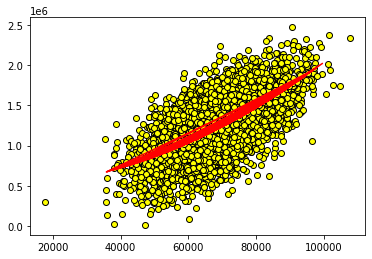

In [19]:
plt.scatter(x_svr, y_svr, color= 'yellow', edgecolors= 'black');
plt.plot(x_svr_test, prediccion, color= 'red');

### X = Avg. Area House Age

In [20]:
x_svr = np.array(df['Avg. Area House Age'])
y_svr = np.array(df['Price']) #target 
print('x_srv:', x_svr.shape)
print('y_srv:', y_svr.shape)

x_srv: (5000,)
y_srv: (5000,)


In [21]:

model_SVR = svm.SVR(kernel='poly', degree=2 , C=100)
x_svr_train, x_svr_test, y_svr_train, y_svr_test = model_selection.train_test_split(x_svr, y_svr, test_size=0.2, random_state=12)

x_svr_train = np.array(x_svr_train).reshape(-1, 1)
x_svr_test = np.array(x_svr_test).reshape(-1, 1)

print('X_svr_train:', x_svr_train.shape)
print('X_svr_test:', x_svr_test.shape)
print('y_svr_train:', y_svr_train.shape)
print('y_svr_test:', y_svr_test.shape)

X_svr_train: (4000, 1)
X_svr_test: (1000, 1)
y_svr_train: (4000,)
y_svr_test: (1000,)


In [23]:
model_SVR.fit(x_svr_train, y_svr_train)
print('\n')
print('Score SVR train set (Age):', model_SVR.score(x_svr_train, y_svr_train) * 100)
print('Score SVR test set (Age):', model_SVR.score(x_svr_test, y_svr_test) * 100)



Score SVR train set (Age): 20.393117440174237
Score SVR test set (Age): 19.261566385531847


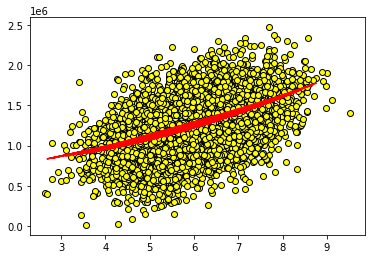

In [24]:
prediccion = model_SVR.predict(x_svr_test)
plt.scatter(x_svr, y_svr, color= 'yellow', edgecolors= 'black');
plt.plot(x_svr_test, prediccion, color= 'red');

### X = Avg. Area Number of Rooms


In [25]:
x_svr = np.array(df['Avg. Area Number of Rooms'])
y_svr = np.array(df['Price'])
print('x_srv:', x_svr.shape)
print('y_srv:', y_svr.shape)

x_srv: (5000,)
y_srv: (5000,)


In [26]:
model_SVR = svm.SVR(kernel='poly', degree=2, C=100)
x_svr_train, x_svr_test, y_svr_train, y_svr_test = model_selection.train_test_split(x_svr, y_svr, test_size=0.2, random_state=90)

x_svr_train = np.array(x_svr_train).reshape(-1, 1)
x_svr_test = np.array(x_svr_test).reshape(-1, 1)

print('X_svr_train:', x_svr_train.shape)
print('X_svr_test:', x_svr_test.shape)
print('y_svr_train:', y_svr_train.shape)
print('y_svr_test:', y_svr_test.shape)

X_svr_train: (4000, 1)
X_svr_test: (1000, 1)
y_svr_train: (4000,)
y_svr_test: (1000,)




Score SVR TRAIN (Age): 11.596569103192566
Score SVR TEST (Age): 9.891219202946822


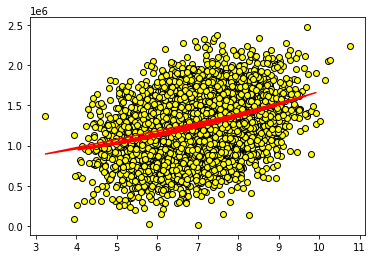

In [27]:


model_SVR.fit(x_svr_train, y_svr_train)
print('\n')
print('Score SVR TRAIN (Age):', model_SVR.score(x_svr_train, y_svr_train) * 100)
print('Score SVR TEST (Age):', model_SVR.score(x_svr_test, y_svr_test) * 100)

prediccion = model_SVR.predict(x_svr_test)
plt.scatter(x_svr, y_svr, color= 'yellow', edgecolors= 'black');
plt.plot(x_svr_test, prediccion, color= 'red');

### X = Avg. Area Number of Bedrooms

In [ ]:
x_svr = np.array(df['Avg. Area Number of Bedrooms'])
y_svr = np.array(df['Price'])
print('x_srv:', x_svr.shape)
print('y_srv:', y_svr.shape)

In [28]:

model_SVR = svm.SVR(kernel='poly', degree=2, C=100)

x_svr_train, x_svr_test, y_svr_train, y_svr_test = model_selection.train_test_split(x_svr, y_svr, test_size=0.2, random_state=111)

x_svr_train = np.array(x_svr_train).reshape(-1, 1)
x_svr_test = np.array(x_svr_test).reshape(-1, 1)

print('X_svr_train:', x_svr_train.shape)
print('X_svr_test:', x_svr_test.shape)
print('y_svr_train:', y_svr_train.shape)
print('y_svr_test:', y_svr_test.shape)



X_svr_train: (4000, 1)
X_svr_test: (1000, 1)
y_svr_train: (4000,)
y_svr_test: (1000,)


In [29]:
model_SVR.fit(x_svr_train, y_svr_train)
print('\n')
print('Score SVR train set (Age):', model_SVR.score(x_svr_train, y_svr_train) * 100)
print('Score SVR test set (Age):', model_SVR.score(x_svr_test, y_svr_test) * 100)



Score SVR train set (Age): 10.91648032151804
Score SVR test set (Age): 12.57954494361988


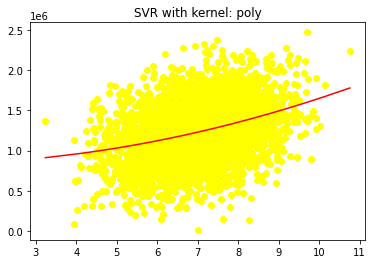

In [31]:
prediccion = model_SVR.predict(x_svr_test)

X_train_to_show, y_train_to_show = zip(*sorted(zip(x_svr_train, y_svr_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='yellow')
X_train_to_show, y_pred = zip(*sorted(zip(x_svr_train, model_SVR.predict(x_svr_train))))
plt.plot(X_train_to_show, y_pred, color='red')
plt.title("SVR with kernel: " + str('poly'))
plt.show()

### X = Area Population

In [32]:
x_svr = np.array(df['Area Population'])
y_svr = np.array(df['Price'])
print('x_srv:', x_svr.shape)
print('y_srv:', y_svr.shape)

x_srv: (5000,)
y_srv: (5000,)


In [33]:

model_SVR = svm.SVR(kernel='poly', degree=2, C=100)
x_svr_train, x_svr_test, y_svr_train, y_svr_test = model_selection.train_test_split(x_svr, y_svr, test_size=0.3, random_state=50)

x_svr_train = np.array(x_svr_train).reshape(-1, 1)
x_svr_test = np.array(x_svr_test).reshape(-1, 1)

print('X_svr_train:', x_svr_train.shape)
print('X_svr_test:', x_svr_test.shape)
print('y_svr_train:', y_svr_train.shape)
print('y_svr_test:', y_svr_test.shape)



X_svr_train: (3500, 1)
X_svr_test: (1500, 1)
y_svr_train: (3500,)
y_svr_test: (1500,)


In [34]:
model_SVR.fit(x_svr_train, y_svr_train)
print('\n')
print('Score SVR train set (Age):', model_SVR.score(x_svr_train, y_svr_train) * 100)
print('Score SVR test set (Age):', model_SVR.score(x_svr_test, y_svr_test) * 100)





Score SVR train set (Age): 16.056419691816803
Score SVR test set (Age): 15.696345654860956


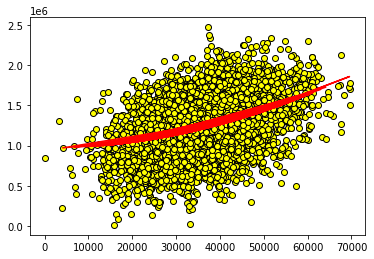

In [35]:
prediccion = model_SVR.predict(x_svr_test)
plt.scatter(x_svr, y_svr, color= 'yellow', edgecolors= 'black');
plt.plot(x_svr_test, prediccion, color= 'red');